In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [6]:
pd.options.display.max_colwidth=800
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

In [7]:
df = pd.read_csv('datasets/SatisfactionClients/cdiscount.csv', index_col=0)
df.head(50)

,note,commentaire
0,1,"Après avoir soutenu le livreur la poste dans sa déclaration COLIS LIVRE vient de m'aviser que ce colis suite à non réclamation vient d'être retourné à l'expéditeur, donc tous des menteurs le colis n'a donc jamais été livré, en voici la preuve flagrante, C.discount persiste en me demandant malgré cette déclaration un tas de justificatifs INUTILES .MENTEURS et VOLEURS !"
1,1,"Le service client est aux abonnés absents. Je vous invite a chercher les commentaires. Seuls ceux qui sont ok passent le reste il est extrême tout difficile d’avertir. Personnellement j’ai commandé un réfrigérateur, on me livre la mauvaise référence et depuis 6mois on me propose uniquement une reprise mais sans re livraison donc je fais comment avec mes aliments dans mon réfrigérateur combiné… ni mise en demeure etc ne fonctionne"
2,1,"J'attends une livraison entre le 21-26/01, à ma grande surprise je reçois un mail m'indiquant un retard de 2 mois supplémentaire..Stupéfaite, sachant que la commande date du 12 décembre..Donc 2 mois pour informer le client que le produit ne sera pas disponible et en plus aucun dédommagement et de compréhension ne sont faite via les réseaux (Twitter notamment)Une expérience et un service client déplorable (sur les reseaux) sauf une personne gentille par téléphone."
3,1,"Bonjour, Achat d un frigo de type Américain + un canapé d angle, résultat mon canapé a pas été livré complètement et le frigo en rade au bout d un an et 15 jours d'attente pour une éventuelle réparation, donc pas le choix d en racheter un autre pour pouvoir garder nos denrées au frais, donc réactivité 0 pointé, nil,nul,nul et nul"
4,1,"Pas sérieux du tout. Gros électroménager peu fiable. Nous avons acheté une télévision tombée en panne à la fin de la garantie, un ordinateur idem, un micro ondes arrivé gabosse nous le refusons le 2 ème tombe en panne à la fin de garantie. Nous rachetons une télévision avec extension de garantie celle-ci tombe en panne 1 an et demi après achat on nous rembourse la télévision mais pas l'extension de garantie qui nous a servi à rien vu qu'elle est tombée en panne sur la garantie constructeur."
5,3,"Pour le traitement global de la commande, rien à redire.Pour le paiement, multiples choix avec options selon son type de paiement.Toujours un soucis avec ma carte CDiscount qui semble être bloquée uniquement sur le site... LOL !Mais à part cela, rien à redire.Bon site et bon choix dans l'ensemble."
6,1,"LE MATIN ON ME REPOND AU TEL QUE C EST D ACCORD POUR M ENVOYER UN TRANSPORTEUR A DOMICILE POUR RECUPERER UN COLIS ENCOMBRANT ET L APRES-MIDI ON ME DIT QUE CE N EST PLUS POSSIBLE A MOI DE ME DEBROUILLER, CE COLIS NE PEUT PARTIR PAR LA POSTE !!!!!!!!!!!!!!!!!!!!!!!!!"
7,1,catastrophique c'est le seul mot qui me viens en tête pour cette entreprise....j'ai voulu acheté un tel que j'ai renvoyer ils m'ont prélever puis rembourser puis reprélever maintenant il me demande des sous.... bref nul nul nul plus jamais avec eux...;
8,1,"Demain, lundi 21/01/2023, rdv gendarmerie pour un dépôt de plainte. Ces conn..... ont utilisé ma carte bancaire lors d'un achat pour me mettre un abonnement annuel de 30€! totalement interdit. La case était bien décocher, AUCUNE demande d'autorisation de leurs part. Pour infos, je ne suis PAS un simple citoyen.. Je vous garanti que vous allez ramasser."
9,5,"Jamais eu à me plaindre pour le moment, large choix d'article avec de la bonne qualité et moins cher que les commerces.10/10 Pour le moment, j'espère n'avoir aucun soucis, si pour la pelouse synthétique, j'ai reçus de la moquette extérieur, comme j'avais mis trop de temps à les ouvrir et m'en apercevoir, que je n'ais pas osé téléphoné."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119900 entries, 0 to 119899
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   note         119900 non-null  int64 
 1   commentaire  84494 non-null   object
dtypes: int64(1), object(1)
memory usage: 2.7+ MB


In [9]:
df = df[df['commentaire'].isna()==False]

In [10]:
df.isna().sum()

note           0
commentaire    0
dtype: int64

### Chargement des stopswords

In [11]:
# chargement de la bibliothèque de stopwords et de tokenisation
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.tokenize import PunktSentenceTokenizer

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\t.fourtouill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# chargement des listes stopwords pour les 3 langues principales 
stop_words_french = stopwords.words('french')
stop_words_english = stopwords.words('english')
stop_words_spanish = stopwords.words('spanish')

In [16]:
# création d'une stopwords regroupant les 3 langues
stop_words = stop_words_french + stop_words_english + stop_words_spanish

### retraitement des commentaires et titres 

In [14]:
def commentaire_filtering(txt, stop_words):
    new_txt = ""
    tokenizer = RegexpTokenizer("[a-zA-Zéèëãñ\']{3,}")
    tokens = tokenizer.tokenize(txt.lower())
    for word in tokens:
        if word not in stop_words:
            new_txt += str(word) + " "
    return new_txt

In [17]:
# création d'une colonne commentaire_filtre par application de la fonction commentaire_filtering à la colonne commentaire
t0 = time()
df['new_commentaire'] = df['commentaire'].apply(lambda x : commentaire_filtering(str(x), stop_words))
print('le temps de calcul est de {:.2f}'.format(time()-t0))

le temps de calcul est de 14.39


In [29]:
df['note'].value_counts()

5    48951
4    17295
1    10117
3     5616
2     2515
Name: note, dtype: int64

In [18]:
new_df = df.drop(columns=['commentaire']).rename(columns={'new_commentaire' : 'commentaire'})

In [31]:
new_df.head(3)

,note,commentaire
0,1,après avoir soutenu livreur poste déclaration colis livre vient m'aviser colis suite non réclamation vient tre retourné l'expéditeur donc tous menteurs colis n'a donc jamais livré voici preuve flagrante discount persiste demandant malgré cette déclaration tas justificatifs inutiles menteurs voleurs
1,1,service client abonnés absents invite chercher commentaires seuls ceux passent reste extr tout difficile avertir personnellement commandé réfrigérateur livre mauvaise référence depuis mois propose uniquement reprise sans livraison donc fais comment aliments réfrigérateur combiné mise demeure etc fonctionne
2,1,j'attends livraison grande surprise ois mail m'indiquant retard mois supplémentaire stupéfaite sachant commande date décembre donc mois informer client produit disponible plus aucun dédommagement compréhension faite via réseaux twitter notamment expérience service client déplorable reseaux sauf personne gentille téléphone


### Enregistrement du dataset

In [34]:
new_df.to_csv('datasets/SatisfactionClients/cdiscount2.csv', index=False)

### Séparation en 2 : positif et négatif

In [19]:
new_df2 = new_df[new_df['note']!=3]
new_df2['note'] = new_df2['note'].replace([1, 2, 4, 5], [0, 0, 1, 1])
new_df2.head(3)

C:\Users\TB84A~1.FOU\AppData\Local\Temp/ipykernel_21864/194625483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['note'] = new_df2['note'].replace([1, 2, 4, 5], [0, 0, 1, 1])


,note,commentaire
0,0,après avoir soutenu livreur poste déclaration colis livre vient m'aviser colis suite non réclamation vient tre retourné l'expéditeur donc tous menteurs colis n'a donc jamais livré voici preuve flagrante discount persiste demandant malgré cette déclaration tas justificatifs inutiles menteurs voleurs
1,0,service client abonnés absents invite chercher commentaires seuls ceux passent reste extr tout difficile avertir personnellement commandé réfrigérateur livre mauvaise référence depuis mois propose uniquement reprise sans livraison donc fais comment aliments réfrigérateur combiné mise demeure etc fonctionne
2,0,j'attends livraison grande surprise ois mail m'indiquant retard mois supplémentaire stupéfaite sachant commande date décembre donc mois informer client produit disponible plus aucun dédommagement compréhension faite via réseaux twitter notamment expérience service client déplorable reseaux sauf personne gentille téléphone


C:\Users\t.fourtouill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


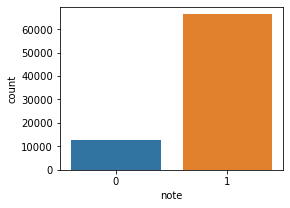

In [20]:
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.countplot(new_df2['note'])
plt.show();

In [36]:
new_df2.to_csv('datasets/SatisfactionClients/cdiscount_0_1.csv', index=False)

In [37]:
new_df['note'].value_counts()

5    48951
4    17295
1    10117
3     5616
2     2515
Name: note, dtype: int64

In [21]:
new_df2['note'].value_counts()

1    66246
0    12632
Name: note, dtype: int64

### Wordcloud

In [22]:
from PIL import Image
from wordcloud import WordCloud

In [28]:
new_df2[new_df2['note']==0]

,note,commentaire
0,0,après avoir soutenu livreur poste déclaration colis livre vient m'aviser colis suite non réclamation vient tre retourné l'expéditeur donc tous menteurs colis n'a donc jamais livré voici preuve flagrante discount persiste demandant malgré cette déclaration tas justificatifs inutiles menteurs voleurs
1,0,service client abonnés absents invite chercher commentaires seuls ceux passent reste extr tout difficile avertir personnellement commandé réfrigérateur livre mauvaise référence depuis mois propose uniquement reprise sans livraison donc fais comment aliments réfrigérateur combiné mise demeure etc fonctionne
2,0,j'attends livraison grande surprise ois mail m'indiquant retard mois supplémentaire stupéfaite sachant commande date décembre donc mois informer client produit disponible plus aucun dédommagement compréhension faite via réseaux twitter notamment expérience service client déplorable reseaux sauf personne gentille téléphone
3,0,bonjour achat frigo type américain canapé angle résultat canapé livré complètement frigo rade bout jours d'attente éventuelle réparation donc choix racheter autre pouvoir garder denrées frais donc réactivité pointé nil nul nul nul
4,0,sérieux tout gros électroménager peu fiable acheté télévision tombée panne fin garantie ordinateur idem micro ondes arrivé gabosse refusons ème tombe panne fin garantie rachetons télévision extension garantie celle tombe panne demi après achat rembourse télévision l'extension garantie servi rien qu'elle tombée panne garantie constructeur
...,...,...
119826,0,n'ai voir conditions carte cdiscount marchait quand j'ai cliqué dessus dommage
119837,0,attendons livraisonje connais ere commande alors lorsque conna trons peu mieux permettrais donner avis
119842,0,site marchand professionnel achat comme service client injoignable laisse soin contacter expose raison mécontentement peut tre ferai payer min télécommunication ailleurs
119858,0,premiere commande eliquide gout malboro etait plut gout medicament vite tout poubelle met etoile produit attend parfum verra bien suive mondial relais plut bizarre promene commande haut bas verra bien


In [29]:
text_commentaires_negatifs = ''
for comment_negatif in new_df2['commentaire'][new_df2['note']==0]:
    text_commentaires_negatifs += str(comment_negatif)
    
text_commentaires_positifs = ''
for comment_positif in new_df2['commentaire'][new_df2['note']==1]:
    text_commentaires_positifs += str(comment_positif)

In [25]:
def plot_word_cloud(text, masque, background_color= "black", max_words=100, stopwords=stop_words):
    # Définir un masque
    mask_coloring =  np.array(Image.open(str(masque)))
    # Définir le calque du nuage des mots
    wc= WordCloud(background_color=background_color, max_words=max_words, 
                 stopwords=stop_words, mask= mask_coloring, 
                 max_font_size=50, random_state=42)
    # Générer et afficher le nuage de mots
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()
    cloud = wc.to_file('cloud.png')

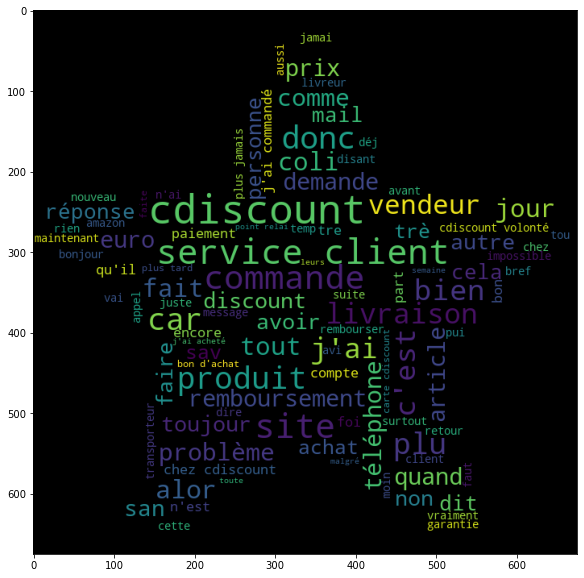

In [30]:
plot_word_cloud(text_commentaires_negatifs, "images/star6.jpg")

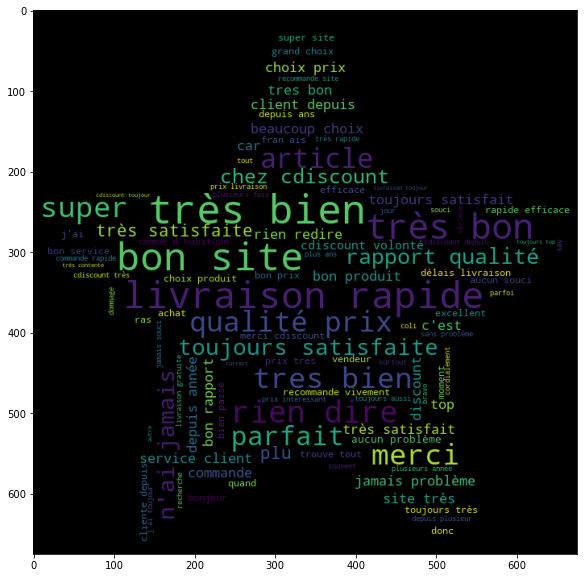

In [31]:
plot_word_cloud(text_commentaires_positifs, "images/star6.jpg")